submitted by Alejandro Hohmann

DSE 241: Exercise 4 Data

HAAS -- BIGHORN SHEEP DOMINANCE

Source: http://moreno.ss.uci.edu/data.html#sheep

### Description: 
    - sheep_age.csv:  
        - Two Columns: Sheep_ID, Sheep_Age
    - sheep_edges.csv: 
        - Three Columns: Source_Sheep_ID, Target_Sheep_ID, Weight

### Background:
Data record wins and losses for 28 female bighorn sheep observed on the National Bison Range in 1984. The 'Weight' entry is the number of occasions on which the Source sheep was observed dominating the Target sheep. Ages are listed, but those assigned an age of 9 are at least 9 years old; they may be older.

#### Reference:
    Christine Hass, "Social status in female bighorn sheep (Ovis canadensis): expression, development and reproductive correlates." Journal of the Zoological Society of London, 1991, 225: 509-523.Station, Technical Bulletin 73. 

this looks awesome but too late to implement from scratch

https://github.com/plotly/dash-cytoscape

https://stackoverflow.com/questions/17002594/processing-graphml-file-with-networkx-in-python

running from `venv_sheep` with python 3.9

In [27]:
%pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 3.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import os
import networkx as nx
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# for reference
edge_df = pd.read_csv("../../data/sheep_data/sheep_edges.csv")
edge_df

,source,target,weight
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1
...,...,...,...
245,26,6,2
246,20,26,1
247,20,21,3
248,27,26,1


In [10]:
# for reference
age_df = pd.read_csv("../../data/sheep_data/sheep_age.csv")
age_df

,id,age
0,1,8
1,2,8
2,3,4
3,4,7
4,5,8
5,6,3
6,7,5
7,8,4
8,9,7
9,10,9


In [11]:
edge_df['weight'].max()

12

<Axes: >

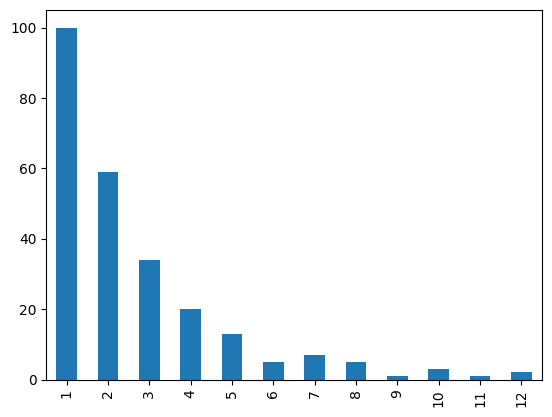

In [12]:
edge_df['weight'].value_counts().sort_index().plot(kind='bar')

In [14]:
edge_df[edge_df['weight'] == 12]

,source,target,weight
23,22,3,12
28,22,23,12


time to make the graph :)

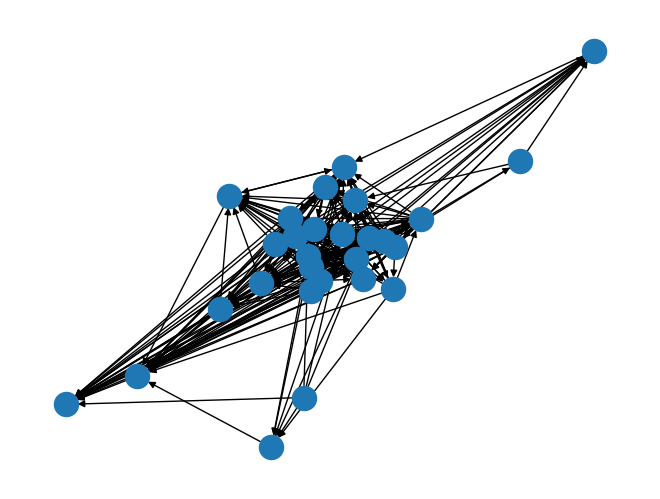

In [53]:
# instantiate graph
# no need to use the csvs, it's already been configured
G = nx.read_graphml("../../data/sheep_ml.graphml")
nx.draw(G)
plt.show()

In [54]:
G.is_directed()

True

In [55]:
G.nodes()

NodeView(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28'))

In [56]:
G.edges()

OutEdgeView([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '4'), ('2', '7'), ('2', '8'), ('2', '9'), ('2', '12'), ('2', '13'), ('2', '15'), ('2', '21'), ('2', '22'), ('2', '23'), ('2', '24'), ('2', '26'), ('2', '27'), ('2', '28'), ('3', '2'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '8'), ('3', '9'), ('3', '14'), ('3', '15'), ('3', '16'), ('3', '18'), ('3', '19'), ('3', '20'), ('3', '21'), ('3', '23'), ('3', '24'), ('3', '25'), ('3', '26'), ('3', '28'), ('4', '2'), ('4', '3'), ('4', '5'), ('4', '6'), ('4', '11'), ('4', '12'), ('4', '15'), ('4', '16'), ('4', '18'), ('4', '19'), ('4', '20'), ('4', '21'), ('4', '23'), ('4', '24'), ('4', '25'), ('4', '26'), ('4', '27'), ('5', '16'), ('5', '21'), ('7', '3'), ('7', '4'), ('7', '8'), ('7', '9'), ('7', '10'), ('7', '11'), ('7', '12'), ('7', '13'), ('7', '14'), ('7', '15'), ('7', '16'), ('7', '17'), ('7', '18'), ('7', '19'), ('7', '20'), ('7', '21'), ('8', '3'), ('8', '4'), ('8', '6'), ('8', '9'), ('8', '13'), ('8', '15'), 

In [57]:
G.edges.data()

OutEdgeDataView([('1', '2', {'weight': 1}), ('1', '3', {'weight': 1}), ('1', '4', {'weight': 1}), ('1', '5', {'weight': 1}), ('1', '6', {'weight': 1}), ('2', '4', {'weight': 1}), ('2', '7', {'weight': 1}), ('2', '8', {'weight': 5}), ('2', '9', {'weight': 3}), ('2', '12', {'weight': 1}), ('2', '13', {'weight': 2}), ('2', '15', {'weight': 1}), ('2', '21', {'weight': 4}), ('2', '22', {'weight': 1}), ('2', '23', {'weight': 2}), ('2', '24', {'weight': 3}), ('2', '26', {'weight': 5}), ('2', '27', {'weight': 2}), ('2', '28', {'weight': 4}), ('3', '2', {'weight': 1}), ('3', '4', {'weight': 1}), ('3', '5', {'weight': 1}), ('3', '6', {'weight': 5}), ('3', '8', {'weight': 1}), ('3', '9', {'weight': 7}), ('3', '14', {'weight': 7}), ('3', '15', {'weight': 5}), ('3', '16', {'weight': 2}), ('3', '18', {'weight': 3}), ('3', '19', {'weight': 5}), ('3', '20', {'weight': 6}), ('3', '21', {'weight': 1}), ('3', '23', {'weight': 8}), ('3', '24', {'weight': 2}), ('3', '25', {'weight': 3}), ('3', '26', {'weig

##### play around with different layouts

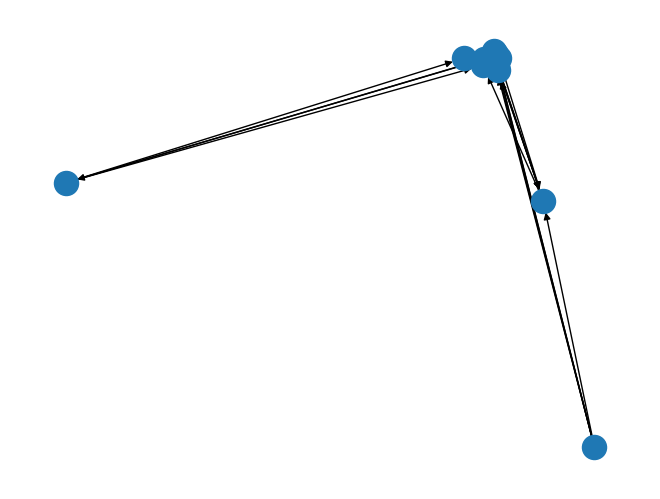

In [41]:
# SPECTRAL
pos = nx.spectral_layout(G, center=[22,3])
nx.draw(G, pos=pos)

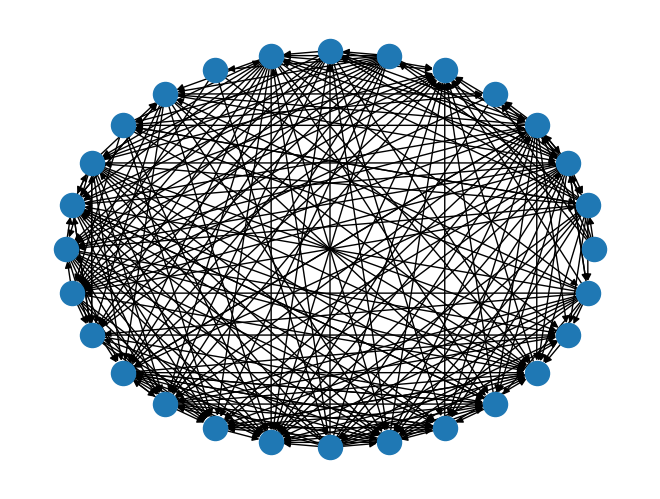

In [44]:
# CIRCULAR
pos = nx.circular_layout(G, center=[22,3])
nx.draw(G, pos=pos)

let's go with spring

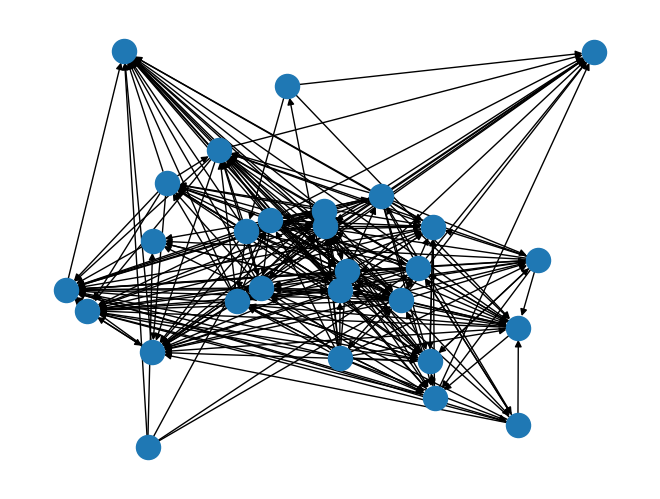

In [58]:
# SPRING
pos = nx.spring_layout(G, k=0.5, iterations=10)
nx.draw(G, pos=pos)

In [63]:
# extract the node positions and add them to our data
for n, p in pos.items():
    G.nodes[n]['pos'] = p

#### now start to assemble in plotly

In [ ]:
# instantiate an empty plot
edge_trace = go.Scatter(
    x=[],
    y=[]

)